In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/shairihub/data-analysis-2026/refs/heads/main/NYPD_Complaint_Data_Current_(Year_To_Date)_20251205.csv")

I want to take a peek at the data in a more orderly way so I make a table.

In [57]:
display(df.head())

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,307449461,121,STATEN ISLAND,05/31/2025,23:31:00,06/01/2025,01:09:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,942556,171417,40.637088,-74.150224,"(40.637088, -74.150224)",POINT (-74.150224 40.637088)
1,304514797,123,STATEN ISLAND,01/10/2025,00:51:00,01/10/2025,01:18:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,935208,139528,40.549522,-74.176469,"(40.549522, -74.176469)",POINT (-74.176469 40.549522)
2,304847615,120,STATEN ISLAND,04/16/2025,13:04:00,04/16/2025,13:25:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,M,952307,171672,40.637828,-74.115095,"(40.637828, -74.115095)",POINT (-74.115095 40.637828)
3,313407936,122,STATEN ISLAND,09/24/2025,01:00:00,09/24/2025,01:10:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,953146,145289,40.565414,-74.111950,"(40.565414, -74.11195)",POINT (-74.11195 40.565414)
4,312100974,123,STATEN ISLAND,08/29/2025,17:30:00,08/29/2025,18:15:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,935100,129213,40.521207,-74.176782,"(40.521207, -74.176782)",POINT (-74.176782 40.521207)


I'm curious about how many rows and columns actually exist.

In [58]:
print('Shape (rows, columns):', df.shape)

Shape (rows, columns): (341, 36)


In [59]:
print(df.columns)

Index(['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'CRM_ATPT_CPTD_CD', 'HADEVELOPT',
       'HOUSING_PSA', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LAW_CAT_CD',
       'LOC_OF_OCCUR_DESC', 'OFNS_DESC', 'PARKS_NM', 'PATROL_BORO', 'PD_CD',
       'PD_DESC', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP',
       'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'Lat_Lon', 'New Georeferenced Column'],
      dtype='object')


[I want to know the types of data I'm working with incase I need to change them or if I run into issues later.

In [60]:
df.info()
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CMPLNT_NUM                341 non-null    int64  
 1   ADDR_PCT_CD               341 non-null    int64  
 2   BORO_NM                   341 non-null    object 
 3   CMPLNT_FR_DT              341 non-null    object 
 4   CMPLNT_FR_TM              341 non-null    object 
 5   CMPLNT_TO_DT              283 non-null    object 
 6   CMPLNT_TO_TM              341 non-null    object 
 7   CRM_ATPT_CPTD_CD          341 non-null    object 
 8   HADEVELOPT                341 non-null    object 
 9   HOUSING_PSA               55 non-null     float64
 10  JURISDICTION_CODE         341 non-null    int64  
 11  JURIS_DESC                341 non-null    object 
 12  KY_CD                     341 non-null    int64  
 13  LAW_CAT_CD                341 non-null    object 
 14  LOC_OF_OCC

,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Lat_Lon,New Georeferenced Column
count,341,341,341,283,341,341,341,341,341,341,...,341,341,341,341,341,341,341,341,341,341
unique,5,190,272,166,217,2,2,5,1,5,...,179,2,7,7,4,5,7,4,303,303
top,BRONX,08/20/2025,17:30:00,08/20/2025,(null),COMPLETED,(null),OTHER,FELONY,INSIDE,...,01/21/2025,(null),UNKNOWN,(null),(null),UNKNOWN,UNKNOWN,M,"(40.803914, -73.878308)",POINT (-73.878308 40.803914)
freq,103,6,5,6,57,319,340,140,341,191,...,6,340,144,136,136,201,199,136,6,6


This is too much data so I drop a bunch of columns to focus on what I really want to see,

In [61]:
df = df.drop(columns=['CMPLNT_NUM', 'PATROL_BORO', 'CMPLNT_FR_TM', 'PD_CD', 'CMPLNT_TO_TM', 'LAW_CAT_CD', 'CRM_ATPT_CPTD_CD', 'JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD', 'LOC_OF_OCCUR_DESC',  'HADEVELOPT', 'HOUSING_PSA', 'PARKS_NM', 'PREM_TYP_DESC', 'RPT_DT', 'STATION_NAME','SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lat_Lon', 'New Georeferenced Column'], errors='ignore')

In [62]:
display(df.head())

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_TO_DT,OFNS_DESC,PD_DESC
0,121,STATEN ISLAND,05/31/2025,06/01/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
1,123,STATEN ISLAND,01/10/2025,01/10/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
2,120,STATEN ISLAND,04/16/2025,04/16/2025,ARSON,"ARSON 2,3,4"
3,122,STATEN ISLAND,09/24/2025,09/24/2025,ARSON,"ARSON 2,3,4"
4,123,STATEN ISLAND,08/29/2025,08/29/2025,ARSON,"ARSON 2,3,4"


In [63]:
display(df.describe(include='object'))

,BORO_NM,CMPLNT_FR_DT,CMPLNT_TO_DT,OFNS_DESC,PD_DESC
count,341,341,283,341,341
unique,5,190,166,1,3
top,BRONX,08/20/2025,08/20/2025,ARSON,"ARSON 2,3,4"
freq,103,6,6,341,215


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ADDR_PCT_CD   341 non-null    int64 
 1   BORO_NM       341 non-null    object
 2   CMPLNT_FR_DT  341 non-null    object
 3   CMPLNT_TO_DT  283 non-null    object
 4   OFNS_DESC     341 non-null    object
 5   PD_DESC       341 non-null    object
dtypes: int64(1), object(5)
memory usage: 16.1+ KB


I have a feeling that there is duplicate data that can mess up the analysis so I find out how to catch those and also how to filter them out.

In [65]:
num_duplicates = df.duplicated().sum()
print('Number of duplicate rows:', num_duplicates)

Number of duplicate rows: 17


In [66]:
df_no_dupes = df.drop_duplicates().copy()
print('Shape after removing duplicates:', df_no_dupes.shape)

Shape after removing duplicates: (324, 6)


I only want to compare arsons in Manhattan and the Bronx.

In [67]:
Boros_filtered = ['MANHATTAN', 'BRONX']
filtered_crime = df_no_dupes[df_no_dupes['BORO_NM'].isin(Boros_filtered)]
display(filtered_crime)

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_TO_DT,OFNS_DESC,PD_DESC
15,1,MANHATTAN,01/10/2025,01/10/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
16,10,MANHATTAN,06/20/2025,NaN,ARSON,"ARSON 2,3,4"
17,10,MANHATTAN,07/29/2025,07/30/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
18,6,MANHATTAN,04/28/2025,04/28/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
20,10,MANHATTAN,08/16/2025,08/16/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
...,...,...,...,...,...,...
293,45,BRONX,04/30/2025,04/30/2025,ARSON,"ARSON 2,3,4"
294,45,BRONX,03/28/2025,03/28/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
303,45,BRONX,11/18/2024,NaN,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
309,107,MANHATTAN,12/10/2024,NaN,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"


I drop NaN vaues for cleaner data plotting.

In [68]:
df = df.dropna()

In [69]:
filtered_crime_dropped_na = filtered_crime.dropna()
display(filtered_crime_dropped_na)

,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_TO_DT,OFNS_DESC,PD_DESC
15,1,MANHATTAN,01/10/2025,01/10/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
17,10,MANHATTAN,07/29/2025,07/30/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
18,6,MANHATTAN,04/28/2025,04/28/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
20,10,MANHATTAN,08/16/2025,08/16/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
21,10,MANHATTAN,06/09/2025,06/10/2025,ARSON,"ARSON 2,3,4"
...,...,...,...,...,...,...
285,47,BRONX,01/16/2025,01/16/2025,ARSON,"ARSON 2,3,4"
289,47,BRONX,11/19/2024,11/19/2024,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"
293,45,BRONX,04/30/2025,04/30/2025,ARSON,"ARSON 2,3,4"
294,45,BRONX,03/28/2025,03/28/2025,ARSON,"ARSON, MOTOR VEHICLE 1 2 3 & 4"


Out of curiousity, I wanted to see arson across the city during this tieme period. Surrisingly, Brooklyn had the highest arson rates.

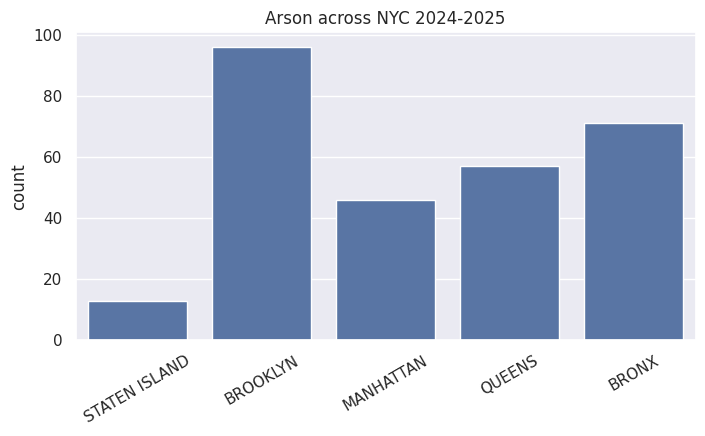

In [70]:
plt.figure(figsize=(8, 4))
sns.countplot(x='BORO_NM', data=df)
plt.title('Arson across NYC 2024-2025')
plt.xticks(rotation=30)
plt.xlabel('')
plt.show()

I'm bringing it back to my original analysis which was going to be to compare the Bronx and Manhattan.

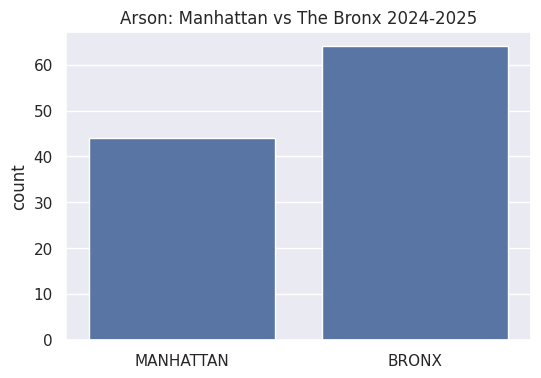

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x='BORO_NM', data=filtered_crime_dropped_na)
plt.title('Arson: Manhattan vs The Bronx 2024-2025')
plt.xlabel('')
plt.show()

I wondered if the number of precincts had something to do with how hhigh  or low the Arson rates were and I do see that there are more precincts in Manhttan than the Bronx.

In [72]:
unique_precincts = filtered_crime_dropped_na.groupby('BORO_NM')['ADDR_PCT_CD'].nunique().reset_index(name='Number of Unique Precincts')
display(unique_precincts)

,BORO_NM,Number of Unique Precincts
0,BRONX,11
1,MANHATTAN,19


Ultimately correlation doesn't equal causation but there may be a connect between the fact that Manhattan has more precincts and less arsons than the Bronx. Maybe more precicts mean more police and more chances to document Arson.